In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, avg_abundance, total_stellar_mass

redshift=2

# z=2 galaxies

Load pre-calculated data from file: ```galaxy_population_data_2.hdf5``` for faster execution.

In [2]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    halflight_radius_U = f['halflight_radius_U'][:]
    halflight_radius_V = f['halflight_radius_V'][:]
    halflight_radius_I = f['halflight_radius_I'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]

Now apply the selection criteria for star-forming, young quiescent (post-starburst), intermediate, and old quiescent galaxies at $z=2$.

In [3]:
import warnings
warnings.filterwarnings('ignore')

PSB_selection = (median_age<=1.2)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
intermediate_quiescent_selection = (median_age>1.2)&(median_age<=1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
old_quiescent_selection = (median_age>1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-10.5)

In [4]:
# axes limits
M_lim = [10.5, 12]
logRe_lim = [-0.52, 1.94]
MRe_lim = [9.36, 11.89]
FeHRe_lim = [-0.39, 0.53]
FeH1kpc_lim = [-0.23, 0.53]
MgFeRe_lim = [0.21, 0.53]
MgFe1kpc_lim = [0.16, 0.55]
MgHRe_lim = [-0.03, 0.77]
MgH1kpc_lim = [0.16, 0.54]
age_lim = [0, 2.5]
ageabundance_lim = [-1.8, 0.9]
bigage_lim = [0, 13]


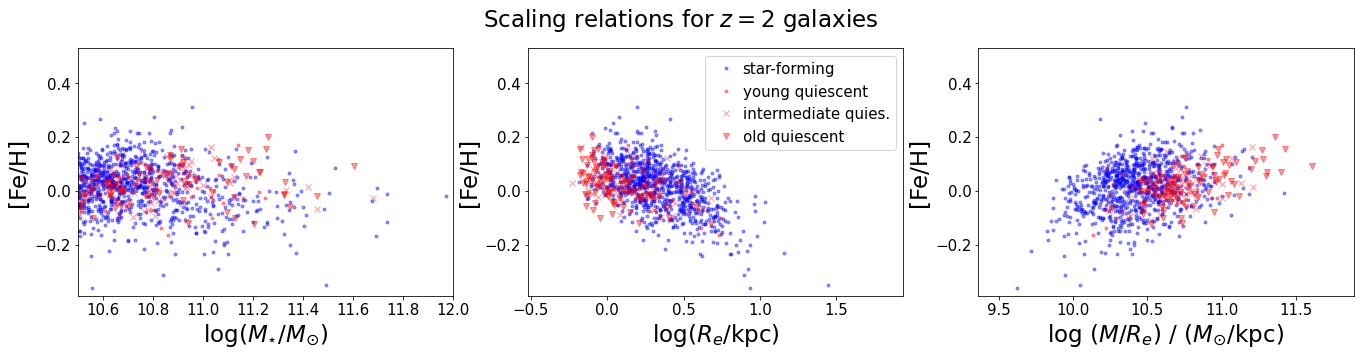

In [15]:
fig = plt.figure(1,figsize=(19,5), constrained_layout=True)
fig.clf()
markersize = 6
fts = 23
fts_s = 17

gs0 = gridspec.GridSpec(1, 1)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
xx = [total_mass, np.log10(halfmass_radius), np.log10(10**total_mass / halfmass_radius)]
yy = [FeH_Re, MgFe_Re, MgH_Re]
xlim = [M_lim, logRe_lim, MRe_lim]
ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['log($M_{\star}/M_{\odot}$)', 'log($R_e$/kpc)', 'log ($M/R_e$) / ($M_{\odot}$/kpc)']
ylabel = ['[Fe/H]', '[Mg/Fe]', '[Mg/H]']

gs[0] = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0])

m=0
for k in range(3):
    ax = plt.subplot(gs[m][k])
        
    yy1 = yy[m][starforming_selection]
    xx1 = xx[k][starforming_selection]
    plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', markersize=markersize)

    yy2 = yy[m][PSB_selection]
    xx2 = xx[k][PSB_selection]
    plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

    yy3 = yy[m][intermediate_quiescent_selection]
    xx3 = xx[k][intermediate_quiescent_selection]
    plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quies.', markersize=markersize)

    yy4 = yy[m][old_quiescent_selection]
    xx4 = xx[k][old_quiescent_selection]
    plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)
        
    ax.set_xlim(xlim[k][0], xlim[k][1])
    ax.set_ylim(ylim[m][0], ylim[m][1])
    ax.set_xlabel(xlabel[k], fontsize=fts)
    ax.set_ylabel(ylabel[m], fontsize=fts)
    ax.tick_params(labelsize=fts_s-2)
        
    if k==1:
        ax.legend(fontsize=fts_s-2, handletextpad=0.1)
        
fig.suptitle('Scaling relations for $z=$' + str(redshift) + ' galaxies', fontsize=fts)
fig.tight_layout()

plt.savefig('REU\cheddar.png', dpi=400, bbox_inches='tight')

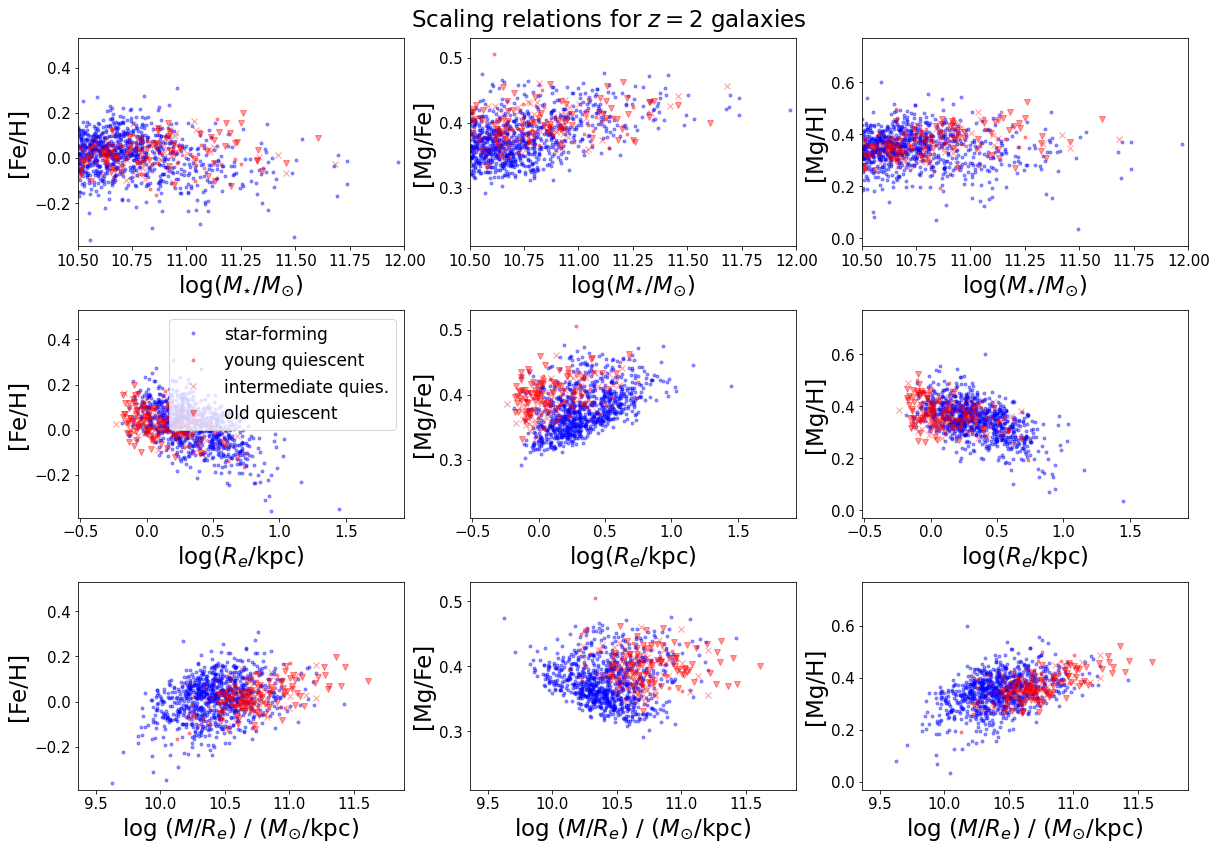

In [6]:
fig = plt.figure(1,figsize=(17,12))
fig.clf()
markersize = 6
fts = 23
fts_s = 17

gs0 = gridspec.GridSpec(3, 1)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
xx = [total_mass, np.log10(halfmass_radius), np.log10(10**total_mass / halfmass_radius)]
yy = [FeH_Re, MgFe_Re, MgH_Re]
xlim = [M_lim, logRe_lim, MRe_lim]
ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['log($M_{\star}/M_{\odot}$)', 'log($R_e$/kpc)', 'log ($M/R_e$) / ($M_{\odot}$/kpc)']
ylabel = ['[Fe/H]', '[Mg/Fe]', '[Mg/H]']

for m in range(3):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[m])

for m in range(3):
    for k in range(3):
        ax = plt.subplot(gs[m][k])
        
        yy1 = yy[k][starforming_selection]
        xx1 = xx[m][starforming_selection]
        plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', markersize=markersize)

        yy2 = yy[k][PSB_selection]
        xx2 = xx[m][PSB_selection]
        plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

        yy3 = yy[k][intermediate_quiescent_selection]
        xx3 = xx[m][intermediate_quiescent_selection]
        plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quies.', markersize=markersize)

        yy4 = yy[k][old_quiescent_selection]
        xx4 = xx[m][old_quiescent_selection]
        plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)
        
        ax.set_xlim(xlim[m][0], xlim[m][1])
        ax.set_ylim(ylim[k][0], ylim[k][1])
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[k], fontsize=fts)
        ax.tick_params(labelsize=fts_s-2)
        
        if k==0 and m==1:
            ax.legend(fontsize=fts_s)
        
fig.suptitle('Scaling relations for $z=$' + str(redshift) + ' galaxies', fontsize=fts)
fig.tight_layout()

plt.savefig('FIGURES\scaling.png', dpi=400)

## [Fe/H]

Text(0.5, 1.0, 'z=2 galaxies')

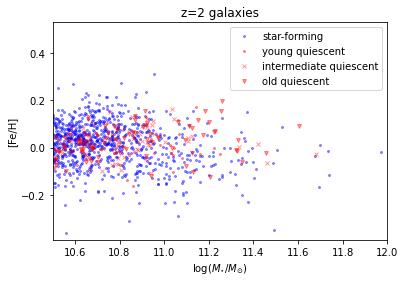

In [17]:
redshift = 2
markersize=4

plt.figure()

yy = FeH_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Fe/H]')
plt.legend()
plt.title('z=2 galaxies')

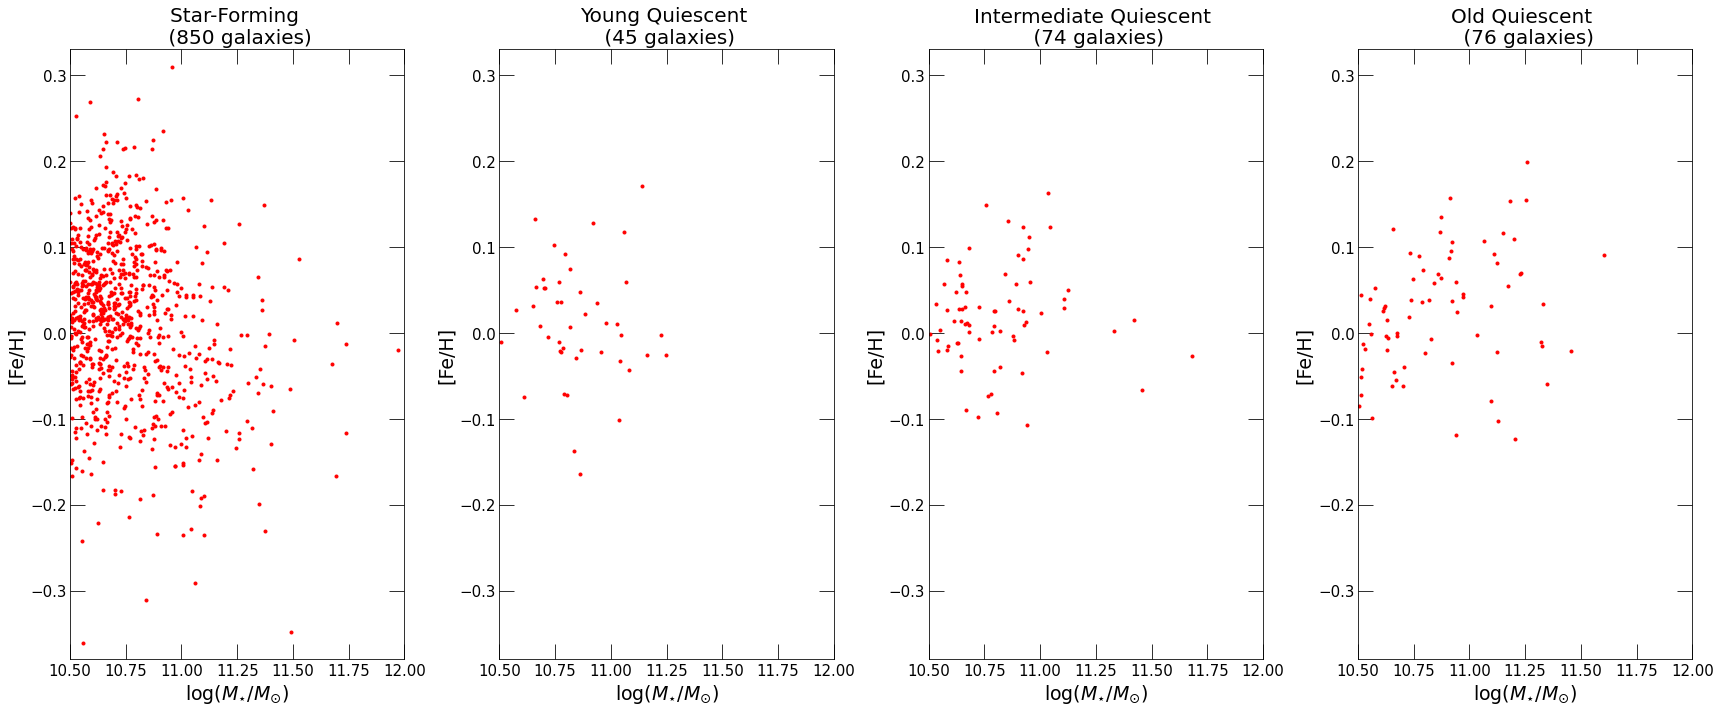

In [5]:
#metallicity profiles
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
redshift = 2
xmin = 10.5
xmax = 12.0
ymin = -0.38
ymax = 0.33

yy = FeH_Re
xx = total_mass

#z=2 star-forming galaxies
yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
ax1.plot(xx1, yy1, 'r.')
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=20) #
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_xlabel('log($M_{\star}/M_{\odot}$)', fontsize=19)
ax1.set_ylabel('[Fe/H]', fontsize=19)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax1.set_xticks([0.2, 1, 10], minor=False)
#ax1.set_xticklabels(['0.2', '1', '10'])

#z=2 young quiescent galaxies
yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
ax2.plot(xx2, yy2, 'r.')
ax2.set_title('Young Quiescent \n ('+str(len(ids[PSB_selection]))+' galaxies)', fontsize=20) #
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xlabel('log($M_{\star}/M_{\odot}$)', fontsize=19)
ax2.set_ylabel('[Fe/H]', fontsize=19)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax2.set_xticks([0.2, 1, 10], minor=False)
#ax2.set_xticklabels(['0.2', '1', '10'])

#z=2 intermediate quiescent galaxies
yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
ax3.plot(xx3, yy3, 'r.')
ax3.set_title('Intermediate Quiescent \n ('+str(len(ids[intermediate_quiescent_selection]))+' galaxies)', fontsize=20) #
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)
ax3.set_xlabel('log($M_{\star}/M_{\odot}$)', fontsize=19)
ax3.set_ylabel('[Fe/H]', fontsize=19)
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax3.set_xticks([0.2, 1, 10], minor=False)
#ax3.set_xticklabels(['0.2', '1', '10'])

#z=2 old quiescent galaxies
yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
ax4.plot(xx4, yy4, 'r.')
ax4.set_title('Old Quiescent \n ('+str(len(ids[old_quiescent_selection]))+' galaxies)', fontsize=20)
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)
ax4.set_xlabel('log($M_{\star}/M_{\odot}$)', fontsize=19)
ax4.set_ylabel('[Fe/H]', fontsize=19)
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax4.set_xticks([0.2, 1, 10], minor=False)
#ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

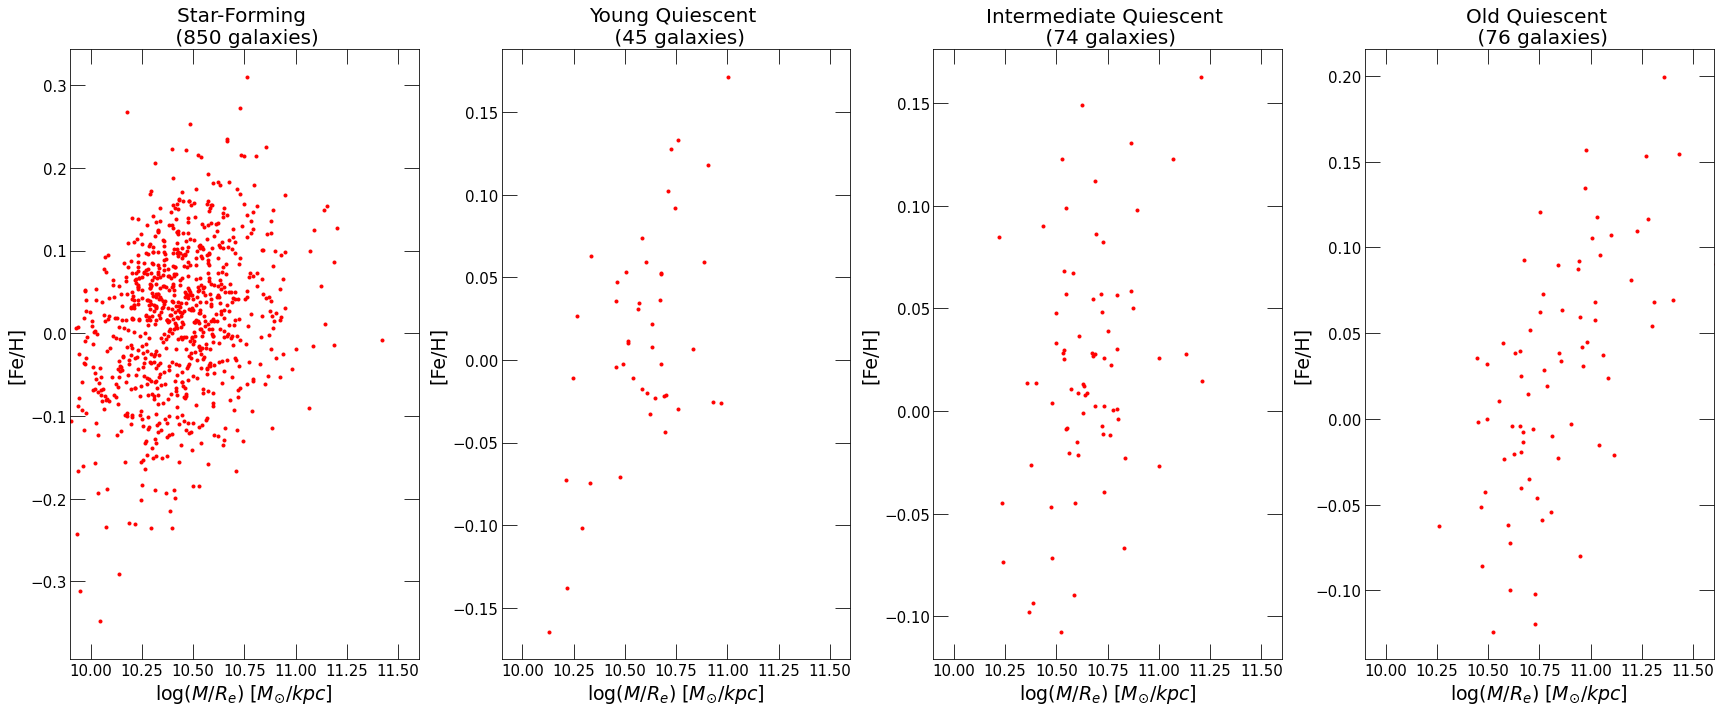

In [6]:
#metallicity profiles
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex='none', sharey='none', figsize=(24, 10))
f.set_facecolor('w')
redshift = 2
xmin = 9.9
xmax = 11.6
ymin = -0.38
ymax = 0.33

yy = FeH_Re
xx = np.log10(10**total_mass / halfmass_radius)

#z=2 star-forming galaxies
yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
ax1.plot(xx1, yy1, 'r.')
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=20) #
ax1.set_xlim(xmin, xmax)
#ax1.set_ylim(ymin, ymax)
ax1.set_xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$', fontsize=19)
ax1.set_ylabel('[Fe/H]', fontsize=19)
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax1.set_xticks([0.2, 1, 10], minor=False)
#ax1.set_xticklabels(['0.2', '1', '10'])

#z=2 young quiescent galaxies
yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
ax2.plot(xx2, yy2, 'r.')
ax2.set_title('Young Quiescent \n ('+str(len(ids[PSB_selection]))+' galaxies)', fontsize=20) #
ax2.set_xlim(xmin, xmax)
#ax2.set_ylim(ymin, ymax)
ax2.set_xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$', fontsize=19)
ax2.set_ylabel('[Fe/H]', fontsize=19)
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax2.set_xticks([0.2, 1, 10], minor=False)
#ax2.set_xticklabels(['0.2', '1', '10'])

#z=2 intermediate quiescent galaxies
yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
ax3.plot(xx3, yy3, 'r.')
ax3.set_title('Intermediate Quiescent \n ('+str(len(ids[intermediate_quiescent_selection]))+' galaxies)', fontsize=20) #
ax3.set_xlim(xmin, xmax)
#ax3.set_ylim(ymin, ymax)
ax3.set_xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$', fontsize=19)
ax3.set_ylabel('[Fe/H]', fontsize=19)
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax3.set_xticks([0.2, 1, 10], minor=False)
#ax3.set_xticklabels(['0.2', '1', '10'])

#z=2 old quiescent galaxies
yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
ax4.plot(xx4, yy4, 'r.')
ax4.set_title('Old Quiescent \n ('+str(len(ids[old_quiescent_selection]))+' galaxies)', fontsize=20)
ax4.set_xlim(xmin, xmax)
#ax4.set_ylim(ymin, ymax)
ax4.set_xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$', fontsize=19)
ax4.set_ylabel('[Fe/H]', fontsize=19)
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
#ax4.set_xticks([0.2, 1, 10], minor=False)
#ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

R_e
Star-forming: 0.09121537182866718
Young quiescent: 0.06724730549074061
Intermediate quiescent: 0.05670722936787823
Old quiescent: 0.06944162432745332


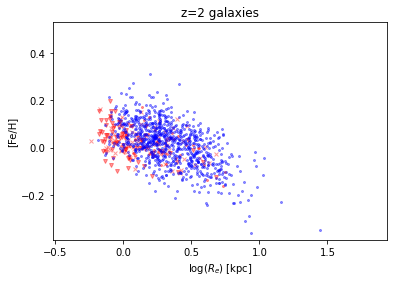

In [13]:
markersize=4

plt.figure()

yy = FeH_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

print('R_e')
std1 = np.std(yy1)
print('Star-forming: ' + str(std1))
std2 = np.std(yy2)
print('Young quiescent: ' + str(std2))
std3 = np.std(yy3)
print('Intermediate quiescent: ' + str(std3))
std4 = np.std(yy4)
print('Old quiescent: ' + str(std4))

Text(0.5, 1.0, 'z=2 galaxies')

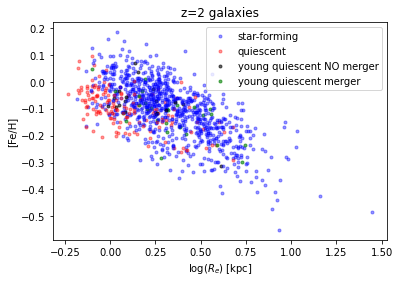

In [5]:
redshift = 2
label1 = False
label2 = False
label3 = False
label4 = False

#select young quiescent galaxies by merger cut-off
# had a significant prior merger 
PSB = (maximum_merger_ratio_30kpc_current_fraction>=0.1) & PSB_selection 
# had no significant prior merger
PSBm = (maximum_merger_ratio_30kpc_current_fraction<0.1) & PSB_selection 

plt.figure()
for id in ids:
    stellar_data = get_galaxy_particle_data(id=id , redshift=redshift, populate_dict=True)
    yy = avg_abundance(id=id, redshift=redshift, num='iron', den='hydrogen', weight='luminosity')
    xx = np.log10(stellar_data['halfmassrad_stars'])
    if id in ids[starforming_selection]:
        if not label1:
            plt.plot(xx, yy, 'b.', alpha=0.4, label='star-forming')
            label1 = True
        else:
            plt.plot(xx, yy, 'b.', alpha=0.4)
    elif id in ids[PSB]:
        if not label3:
            plt.plot(xx, yy, 'g.', alpha=0.6, label='young quiescent merger')
            label3 = True
        else:
            plt.plot(xx, yy, 'g.', alpha=0.6)
    elif id in ids[PSBm]:
        if not label4:
            plt.plot(xx, yy, 'k.', alpha=0.6, label='young quiescent NO merger')
            label4 = True
        else:
            plt.plot(xx, yy, 'k.', alpha=0.6)
    else:
        if not label2:
            plt.plot(xx, yy, 'r.', alpha=0.4, label='quiescent')
            label2 = True
        else:
            plt.plot(xx, yy, 'r.', alpha=0.4)
#plt.xlim(10.5, 12)
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Fe/H]')
plt.legend()
plt.title('z=2 galaxies')

Text(0.5, 1.0, 'z=2 galaxies')

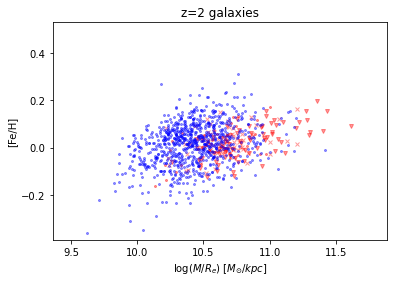

In [21]:
markersize=4

plt.figure()

yy = FeH_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

1 kpc
Star-forming: 0.07799445784381523
Young quiescent: 0.05316397919146814
Intermediate quiescent: 0.06212189545066509
Old quiescent: 0.060555578085981825


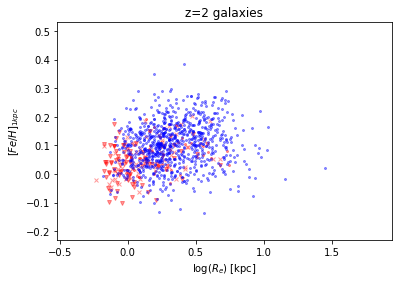

In [11]:
markersize=4

plt.figure()

yy = FeH_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(FeH1kpc_lim[0], FeH1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Fe/H]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

print('1 kpc')
std1 = np.std(yy1)
print('Star-forming: ' + str(std1))
std2 = np.std(yy2)
print('Young quiescent: ' + str(std2))
std3 = np.std(yy3)
print('Intermediate quiescent: ' + str(std3))
std4 = np.std(yy4)
print('Old quiescent: ' + str(std4))

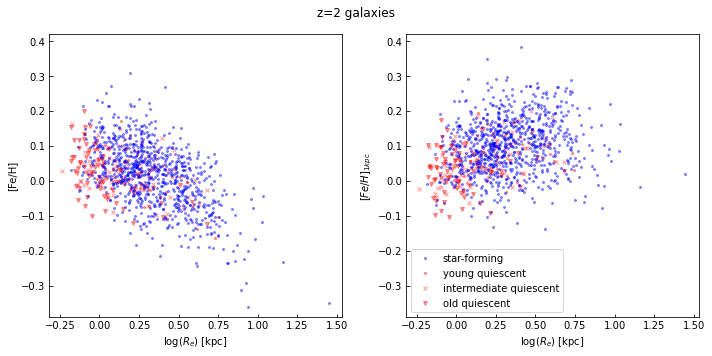

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
markersize = 4
ymin = -0.39
ymax = 0.42

yya = FeH_Re
yyb = FeH_1kpc
xx = np.log10(halfmass_radius)

yya1 = yya[starforming_selection]
yyb1 = yyb[starforming_selection]
xx1 = xx[starforming_selection]
ax1.plot(xx1, yya1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)
ax2.plot(xx1, yyb1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yya2 = yya[PSB_selection]
yyb2 = yyb[PSB_selection]
xx2 = xx[PSB_selection]
ax1.plot(xx2, yya2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)
ax2.plot(xx2, yyb2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yya3 = yya[intermediate_quiescent_selection]
yyb3 = yyb[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
ax1.plot(xx3, yya3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)
ax2.plot(xx3, yyb3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yya4 = yya[old_quiescent_selection]
yyb4 = yyb[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
ax1.plot(xx4, yya4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)
ax2.plot(xx4, yyb4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

ax1.set_xlabel('log($R_e$) [kpc]')
ax1.set_ylabel('[Fe/H]')
ax1.set_ylim(ymin, ymax)
ax1.tick_params(axis='y', which='minor', left=True)
ax1.tick_params(axis='both', which='both', direction='in')

ax2.set_xlabel('log($R_e$) [kpc]')
ax2.set_ylabel('$[Fe/H]_{1 kpc}$')
ax2.set_ylim(ymin, ymax)
ax2.tick_params(axis='y', which='minor', left=True)
ax2.tick_params(axis='both', which='both', direction='in')
ax2.legend()

f.suptitle('z=' + str(redshift) +' galaxies')

f.tight_layout()

Text(0.5, 1.0, 'z=2 galaxies')

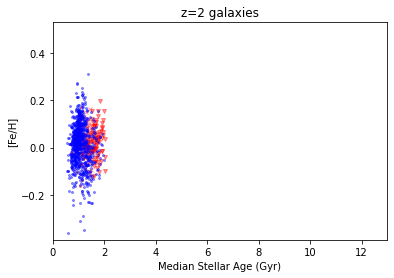

In [17]:
markersize=4

plt.figure()

yy = FeH_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

## [Mg/Fe]

Text(0.5, 1.0, 'z=2 galaxies')

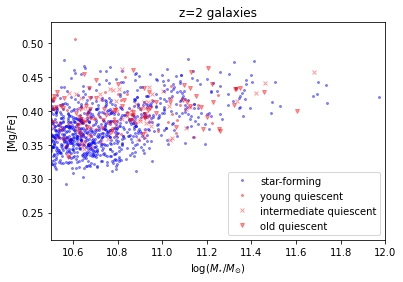

In [23]:
redshift = 2
markersize=4

plt.figure()

yy = MgFe_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Mg/Fe]')
plt.legend()
plt.title('z=2 galaxies')

Text(0.5, 1.0, 'z=2 galaxies')

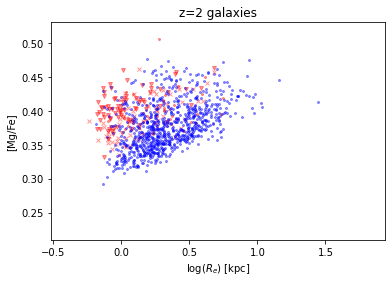

In [25]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=2 galaxies')

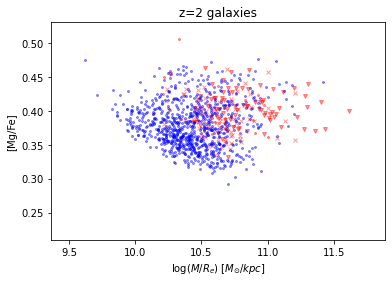

In [26]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=2 galaxies')

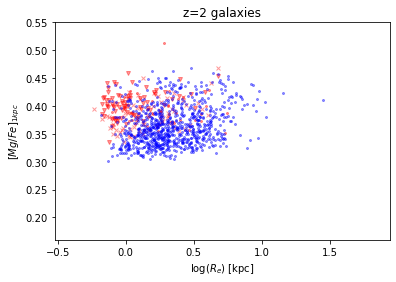

In [27]:
markersize=4

plt.figure()

yy = MgFe_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgFe1kpc_lim[0], MgFe1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Mg/Fe]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=2 galaxies')

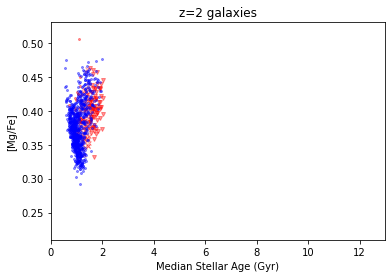

In [16]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

## [Mg/H]

Text(0.5, 1.0, 'z=2 galaxies')

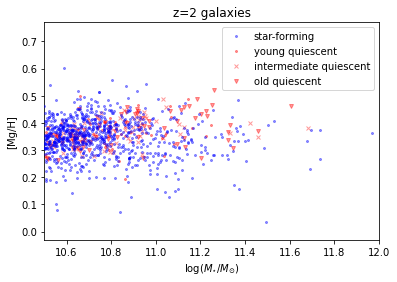

In [28]:
markersize=4

plt.figure()

yy = MgH_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Mg/H]')
plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=2 galaxies')

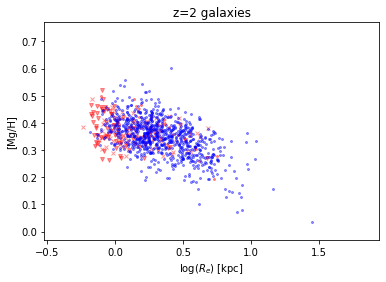

In [29]:
markersize=4

plt.figure()

yy = MgH_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=2 galaxies')

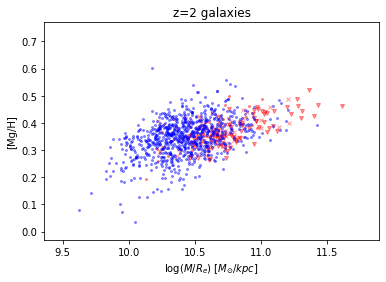

In [30]:
markersize=4

plt.figure()

yy = MgH_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=2 galaxies')

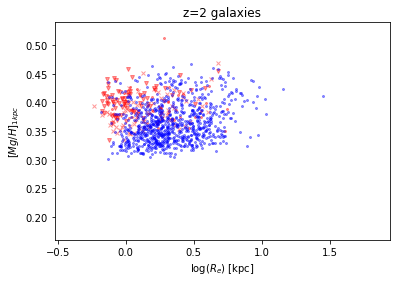

In [31]:
markersize=4

plt.figure()

yy = MgFe_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgH1kpc_lim[0], MgH1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Mg/H]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=2 galaxies')

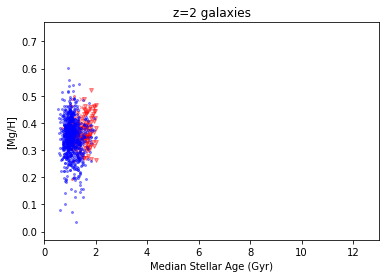

In [15]:
markersize=4

plt.figure()

yy = MgH_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')